## <center>__PROJETO DA UNIDADE 2__</center>

# <center>__Predição de dados de saúde usando regressão linear__</center>
#### <center>__ALUNO: ALYSON MATHEUS VALE DE MACEDO__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

A regressão linear é um método para modelar a relação entre uma ou mais variáveis independentes e uma variável dependente. É um grampo das estatísticas e muitas vezes é considerado um bom método introdutório de aprendizado de máquina. É também um método que pode ser reformulado usando notação matricial e resolvido usando operações matriciais.

Onde usaremos também SVD ao qual foi utilizado na Modelagem de Tópicos, mas neste projeto utilizaremos decomposição QR na linguagem em Python para resolver mínimos quadrados lineares.

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Para predição de dados de saúde usando regressão linear ao seu uso precisamos utilizar QR e SVD que são utilizados para resolver problemas de mínimos quadrados lineares e decomposição em valores singulares.



<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

## Regressão linear

A regressão linear é um método para modelar a relação entre dois valores escalares. Sendo 1 uma variável de entrada e outra de saída.

## Decomposição de Valor Singular (SVD) 

Esperamos claramente que as palavras que aparecem com mais frequência em um tópico apareçam com menos frequência no outro - caso contrário, essa palavra não seria uma boa escolha para separar os dois tópicos. Portanto, esperamos que os tópicos sejam ortogonais .

O algoritmo SVD fatora uma matriz em uma matriz com colunas ortogonais e outra com linhas ortogonais (junto com uma matriz diagonal, que contém a importância relativa de cada fator).


SVD é uma decomposição exata , pois as matrizes que ele cria são grandes o suficiente para cobrir totalmente a matriz original. O SVD é extremamente usado em álgebra linear e, especificamente, em ciência de dados, incluindo:

* análise semântica
* filtragem/recomendações colaborativas ( participação vencedora do Prêmio Netflix )
* calcule o pseudoinverso de Moore-Penrose
* compressão de dados
* análise de componentes principais (será abordada posteriormente no curso)

<img src="svd_fb.png" alt="" />
Fonte: (<link>https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb</link>)

## Decomposição QR

A decomposição QR A decomposição QR é amplamente utilizada em finanças quantitativas como base para a solução do problema dos mínimos quadrados lineares , que por sua vez é usado para análise de regressão estatística.

Um dos principais benefícios do uso de QR decomposição sobre outros métodos para resolver mínimos quadrados lineares é que ele é numericamente mais estável, embora à custa de ser mais lento para executar. Portanto, se você estiver realizando uma grande quantidade de regressões como parte de um backtest de negociação, por exemplo, precisará considerar muito extensivamente se a QR decomposição é o melhor ajuste.

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [13]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math, scipy, numpy as np
from scipy import linalg

### Implementando regressão Linear

In [8]:
np.set_printoptions(precision=6)

In [7]:
data = datasets.load_diabetes()

In [9]:
feature_names=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
trn,test,y_trn,y_test = train_test_split(data.data, data.target, test_size=0.2)

In [11]:
trn.shape, test.shape

((353, 10), (89, 10))

In [12]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), 
     metrics.mean_absolute_error(act, pred))

### Sklearn para tratar adição de uma constante

In [15]:
trn_int = np.c_[trn, np.ones(trn.shape[0])]
test_int = np.c_[test, np.ones(test.shape[0])]

In [16]:
%timeit coef, _,_,_ = linalg.lstsq(trn_int, y_trn, lapack_driver="gelsd")

168 µs ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit coef, _,_,_ = linalg.lstsq(trn_int, y_trn, lapack_driver="gelsy")

81.3 µs ± 7.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%timeit coef, _,_,_ = linalg.lstsq(trn_int, y_trn, lapack_driver="gelss")

162 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Cholesky

Definida positiva quadrada hermitiana

In [19]:
A = trn_int

In [20]:
b = y_trn

In [21]:
AtA = A.T @ A
Atb = A.T @ b

In [22]:
R = scipy.linalg.cholesky(AtA)

In [23]:
np.set_printoptions(suppress=True, precision=4)
R

array([[ 0.9028,  0.1708,  0.1909,  0.3001,  0.247 ,  0.207 , -0.0654,
         0.1938,  0.2468,  0.3009, -1.086 ],
       [ 0.    ,  0.8774,  0.0284,  0.1559, -0.0116,  0.09  , -0.3433,
         0.2765,  0.1042,  0.1426,  0.2854],
       [ 0.    ,  0.    ,  0.8532,  0.2973,  0.1907,  0.2031, -0.294 ,
         0.3186,  0.3486,  0.2878, -0.7602],
       [ 0.    ,  0.    ,  0.    ,  0.788 ,  0.0887,  0.0213,  0.0096,
         0.016 ,  0.1642,  0.1655,  0.3595],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.8512,  0.7809,  0.1119,
         0.4315,  0.3305,  0.1952,  0.5819],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3747, -0.4298,
         0.2932, -0.3085, -0.0413,  0.892 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.6391,
        -0.512 , -0.5435, -0.1285, -0.243 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.2952, -0.0162,  0.0435,  0.8246],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
 

Aviso: Numpy e Scipy têm como padrão superior/inferior diferente para Cholesky

In [24]:
np.linalg.norm(AtA - R.T @ R)

5.684553576848352e-14

In [25]:
w = scipy.linalg.solve_triangular(R, Atb, lower=False, trans='T')

In [26]:
np.linalg.norm(R.T @ w - Atb)

2.1316282072803006e-13

In [27]:
coeffs_chol = scipy.linalg.solve_triangular(R, w, lower=False)

In [28]:
np.linalg.norm(R @ coeffs_chol - w)

5.5038403647350507e-14

In [29]:
def ls_chol(A, b):
    R = scipy.linalg.cholesky(A.T @ A)
    w = scipy.linalg.solve_triangular(R, A.T @ b, trans='T')
    return scipy.linalg.solve_triangular(R, w)

In [30]:
%timeit coeffs_chol = ls_chol(trn_int, y_trn)

80.4 µs ± 9.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
coeffs_chol = ls_chol(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_chol)

(59.16147094606462, 47.968731343902206)

## QR 

In [32]:
def ls_qr(A,b):
    Q, R = scipy.linalg.qr(A, mode='economic')
    return scipy.linalg.solve_triangular(R, Q.T @ b)

In [33]:
%timeit coeffs_qr = ls_qr(trn_int, y_trn)

179 µs ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
coeffs_qr = ls_qr(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_qr)

(59.161470946064654, 47.96873134390223)

## SVD

In [35]:
def ls_svd(A,b):
    m, n = A.shape
    U, sigma, Vh = scipy.linalg.svd(A, full_matrices=False, lapack_driver='gesdd')
    w = (U.T @ b)/ sigma
    return Vh.T @ w

In [36]:
%timeit coeffs_svd = ls_svd(trn_int, y_trn)

185 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
%timeit coeffs_svd = ls_svd(trn_int, y_trn)

207 µs ± 9.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [51]:
coeffs_svd = ls_svd(trn_int, y_trn)
regr_metrics(y_test, test_int @ coeffs_svd)

(59.161470946064696, 47.968731343902284)

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

### Primeiro Caso

Podemos utilizar regressão linear usando uma decomposição de matriaz QR Onde A é a matriz que desejamos decompor, Q uma matriz com o tamanho mxm, e R é uma matriz triangular superior com o tamanho mx n.

A decomposição QR é uma abordagem popular para resolver a equação linear dos mínimos quadrados. A abordagem de decomposição QR é mais eficiente computacionalmente e numericamente mais estável do que calcular a equação normal diretamente, mas não funciona para todas as matrizes de dados.



### Segundo Caso

Podemos utilizar regressão linear usando um SVD junto com pseudoinverso.

A Decomposição de Valor Singular , ou SVD para abreviar, é um método de decomposição de matriz como a decomposição QR. Onde A é a matriz nxm real que desejamos decompor, U é a matriz amxm, Sigma é uma matriz diagonal mxn e V^* é a transposição conjugada de uma matriz nxn.

Ao contrário da decomposição QR, todas as matrizes têm uma decomposição SVD. Como base para resolver o sistema de equações lineares para regressão linear, o SVD é mais estável e a abordagem preferida.

Onde X^+ é o pseudoinverso de X e o + é um sobrescrito, D^+ é o pseudoinverso da matriz diagonal Sigma e V^T é a transposta de V^*.

[1.0023]


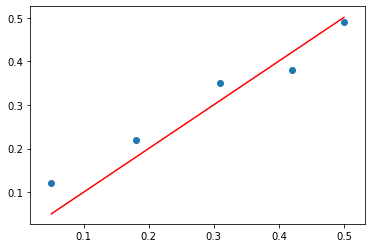

In [71]:
from numpy import array
from numpy.linalg import pinv
from matplotlib import pyplot
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49],
])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()